In [1]:
! pip install kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"sayansh001","key":"a0517fbadb8c251d521b847def10336f"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
! kaggle datasets download -d sayansh001/flowers

flowers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
! unzip /content/flowers.zip

Archive:  /content/flowers.zip
replace flowers/test/daisy/34486116262_411e6991f4_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace flowers/test/daisy/34508227161_a9ff840f71_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [33]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
from PIL import Image
warnings.filterwarnings("ignore",category=FutureWarning)
import os
import random
from keras.preprocessing.image import load_img
import tensorflow as tf
from PIL import Image

Training Image Processing

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
training_set = train_datagen.flow_from_directory(r"/content/flowers/train",
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='categorical',)

Found 4317 images belonging to 5 classes.


# **Test Image Processing**

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(r"/content/flowers/test",
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='categorical')

Found 273 images belonging to 5 classes.


Building Model

In [7]:
cnn = tf.keras.models.Sequential()

2021-12-26 14:59:18.106186: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


Building Convolution Layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,
                               kernel_size=3,
                               activation='relu',
                               input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,
                               kernel_size=3,
                               activation='relu',))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [11]:
cnn.add(tf.keras.layers.Flatten())

Hidden Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

In [14]:
cnn.compile(optimizer="rmsprop",
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [15]:
cnn.fit(x=training_set,
        validation_data=test_set,
        epochs=30)

Epoch 1/30
135/135 [==============================] - 32s 219ms/step - loss: 1.3578 - accuracy: 0.4480 - val_loss: 1.1552 - val_accuracy: 0.5531
Epoch 2/30
135/135 [==============================] - 17s 129ms/step - loss: 1.0704 - accuracy: 0.5689 - val_loss: 1.0233 - val_accuracy: 0.5934
Epoch 3/30
135/135 [==============================] - 17s 128ms/step - loss: 0.9581 - accuracy: 0.6284 - val_loss: 1.1577 - val_accuracy: 0.5714
Epoch 4/30
135/135 [==============================] - 26s 193ms/step - loss: 0.9014 - accuracy: 0.6481 - val_loss: 0.9151 - val_accuracy: 0.6667
Epoch 5/30
135/135 [==============================] - 22s 161ms/step - loss: 0.8328 - accuracy: 0.6829 - val_loss: 0.8568 - val_accuracy: 0.6520
Epoch 6/30
135/135 [==============================] - 17s 128ms/step - loss: 0.8086 - accuracy: 0.6894 - val_loss: 1.0979 - val_accuracy: 0.5897
Epoch 7/30
135/135 [==============================] - 18s 129ms/step - loss: 0.7684 - accuracy: 0.7118 - val_loss: 0.9227 - val_ac

Preprocessing the image

In [16]:
from keras.preprocessing import image
test_image = image.load_img(r'/content/flowers/test/rose/18990187093_09f2bff8fc_m.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)  #we have to expand the dimesnions so that it is same as in convolution layer
# as we have to flatten it we are writing axis=0
result = cnn.predict(test_image)

In [17]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

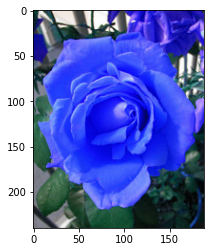

In [18]:
import cv2 
import matplotlib.pyplot as plt
img=cv2.imread(r"/content/flowers/test/rose/18990187093_09f2bff8fc_m.jpg")
plt.imshow(img)
plt.show()

In [19]:
class_names=[]
for class_name in os.listdir('/content/flowers/train'):
    class_names.append(class_name)
class_names = sorted(class_names)
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [20]:
print(result)

[[0. 0. 1. 0. 0.]]


In [21]:
if result[0][0]==1:
   print('Daisy')
elif result[0][1]==1:
   print('Dandelion')
elif result[0][2]==1:
   print('Rose')
elif result[0][3]==1:
   print('Sunflower')
elif result [0][4]==1:
   print('Tulip')

Rose


In [22]:
tf.keras.models.save_model(cnn,'floweridentity.hdf5')